# Naive Bayes Gaussian - Children and Adults

### Generating some training data
Each indiviudal has two atributes (x0,x1) 

* x0  is heigth and 
* x1  is weight 

There are two clases of individuals

* babies
* children and 
* adults

We generate 160 training examples 

* 20 babies ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 40 children ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])

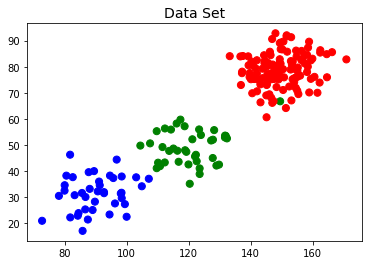

In [4]:
import numpy as np
import matplotlib.pyplot as plt

babies = np.random.multivariate_normal([90, 30], [[70,10 ],[10, 40]], 40)
children = np.random.multivariate_normal([120, 50], [[90,10 ],[10, 40]], 40)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)
x = np.concatenate((babies, children ,adults),axis=0)

y1 = np.empty(len(babies))
y2 = np.empty(len(children))
y3 = np.empty(len(adults))
y1.fill(0)
y2.fill(1)
y3.fill(2)
y = np.concatenate((y1,y2, y3),axis=0)

color= ['blue' if v == 0 else ('green' if v == 1 else 'red') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(), c=color, s=50)
plt.title('Data Set', size=14);

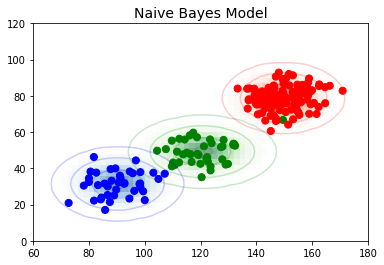

In [5]:
fig, ax = plt.subplots()
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (60, 180)
ylim = (0, 120)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'green', 'red']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
models = [GaussianNB, MultinomialNB]
model = models[0]()
model.fit(x, y);

### The desicion boundary in Gaussian naive Bayes is quadratic.

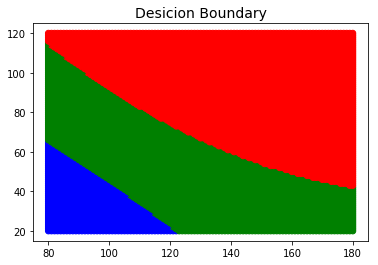

In [7]:
x0  = np.linspace(80,180,101)
x1 =  np.linspace(20,120,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)

colormesh=  ['blue' if v == 0 else ('green' if v == 1 else 'red') for v in ymesh]
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14);

In [8]:
rng = np.random.RandomState(0)
xnew = [80, 20] + [100, 100] * rng.rand(500, 2) 
ynew = model.predict(xnew)

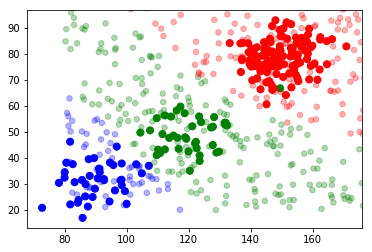

In [9]:
color= ['blue' if v == 0 else ('green' if v == 1 else 'red') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
lim = plt.axis()

colornew= ['blue' if v == 0 else ('green' if v == 1 else 'red') for v in ynew]
plt.scatter(xnew[:, 0], xnew[:, 1], c=colornew, s=30,  alpha=0.3)
plt.axis(lim);

### Pobabilistic classification - posterior probabilities for the classes


In [10]:
xnew[-20:].round(2)

array([[102.01,  82.29],
       [ 91.15,  65.9 ],
       [112.23,  51.65],
       [128.26,  92.98],
       [ 86.92, 107.92],
       [153.48,  37.65],
       [173.92,  70.63],
       [179.98,  39.73],
       [133.49,  49.02],
       [110.42,  79.11],
       [172.17, 100.53],
       [152.39,  75.92],
       [172.23,  69.24],
       [167.38, 103.4 ],
       [101.38,  97.12],
       [ 81.22,  52.28],
       [102.96,  70.69],
       [153.69,  29.77],
       [131.49, 113.84],
       [102.86,  87.71]])

In [11]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[0.  , 1.  , 0.  ],
       [0.01, 0.99, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.32, 0.68],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.9 , 0.1 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.02, 0.98],
       [0.99, 0.01, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.8 , 0.2 ]])

## References
1. Naive Bayes 3: Gaussian examplea  Victor Lavrenko  https://www.youtube.com/watch?v=r1in0YNetG8&amp;list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&amp;index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/